# Yaw's Transaction Data Project

## What This Model Showcases:
- This project highlights my expertise in logistic regression, data interpretation, random forest, and gradient boosting to significantly improve the prediction of fraudulent transactions.
- I demonstrated strong model evaluation skills, iteratively tuning hyperparameters to enhance prediction accuracy.
- I also showcased problem-solving by refining the model through data-driven techniques, leading to a marked improvement in accuracy—critical for optimizing ad targeting and making informed marketing decisions.

## Notes:
This dataset is particularly challenging for achieving high accuracy. In similar Kaggle datasets, typical results range between 52%-53%:

- Example 1: [53%](https://www.kaggle.com/code/jayrdixit/transaction-data)
- Example 2: [52%](https://www.kaggle.com/code/neamulislamfahim/transaction-data-for-fraud-analysis)
- Example 3: [52%](https://www.kaggle.com/code/kkimiraik/cb-vs-lstm-1)

## Results:
In my attempt, I was able to achieve 54% accuracy. Starting with logistic regression as a baseline, I then moved on to decision trees to explore better performance. Finally, I implemented random forest and gradient boosting, leading to noticeable improvements.

## Project Overview:
This project uses synthetic transaction data, where nearly half of the transactions are fraudulent. I applied Machine Learning techniques to detect these fraudulent transactions.

### Dataset Features:
- The dataset includes variables such as location, transaction_id, purchase type (groceries, restaurants, online), credit card type (AMEX, MC, Visa, Discover), and more.


<h1><b> Import Libaries </b></h1>

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing



filterwarnings("ignore")

<h1><b> Get the Data </b></h1>


In [135]:
fin_data = pd.read_csv('synthetic_financial_data.csv')

In [136]:
fin_data.head()

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,1/1/2023 0:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,1/1/2023 0:00,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,1/1/2023 0:00,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,1/1/2023 0:00,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,1/1/2023 0:00,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


In [137]:
#info
fin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  object 
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  object 
 7   location                 10000 non-null  object 
 8   purchase_category        10000 non-null  object 
 9   customer_age             10000 non-null  int64  
 10  transaction_description  10000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 859.5+ KB


<h3><b>Understanding our Data</b></h3>
    
<ul>
    <li><b>Most data are integers/floats except card_type, location, purchase_category, and transaction_description</b></li>
</ul>

In [139]:
fin_data_obj = fin_data.select_dtypes("object")

In [140]:
fin_data_obj

,transaction_time,card_type,location,purchase_category,transaction_description
0,1/1/2023 0:00,MasterCard,City-30,Gas Station,Purchase at Merchant-2027
1,1/1/2023 0:00,Visa,City-47,Online Shopping,Purchase at Merchant-2053
2,1/1/2023 0:00,MasterCard,City-6,Gas Station,Purchase at Merchant-2035
3,1/1/2023 0:00,Discover,City-6,Travel,Purchase at Merchant-2037
4,1/1/2023 0:00,MasterCard,City-34,Retail,Purchase at Merchant-2083
...,...,...,...,...,...
9995,1/1/2023 2:46,MasterCard,City-39,Restaurant,Purchase at Merchant-2023
9996,1/1/2023 2:46,MasterCard,City-32,Retail,Purchase at Merchant-2026
9997,1/1/2023 2:46,American Express,City-1,Online Shopping,Purchase at Merchant-2034
9998,1/1/2023 2:46,Visa,City-11,Retail,Purchase at Merchant-2019


In [141]:
fin_data_int = fin_data.select_dtypes("int64")

In [142]:
fin_data_int

,transaction_id,customer_id,merchant_id,is_fraudulent,customer_age
0,1,1082,2027,0,43
1,2,1015,2053,1,61
2,3,1004,2035,1,57
3,4,1095,2037,1,59
4,5,1036,2083,1,36
...,...,...,...,...,...
9995,9996,1056,2023,1,36
9996,9997,1053,2026,0,42
9997,9998,1041,2034,0,36
9998,9999,1009,2019,1,57


In [143]:
fin_data.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,10000.0,5000.500000,2886.895680,1.00,2500.750,5000.500,7500.2500,10000.00
customer_id,10000.0,1051.272300,28.864062,1001.00,1026.000,1052.000,1076.0000,1100.00
merchant_id,10000.0,2050.486600,28.877801,2001.00,2025.000,2050.000,2076.0000,2100.00
amount,10000.0,4958.381617,2899.699675,10.61,2438.175,4943.945,7499.3125,9999.75
is_fraudulent,10000.0,0.506800,0.499979,0.00,0.000,1.000,1.0000,1.00
customer_age,10000.0,44.047500,15.321707,18.00,31.000,44.000,57.0000,70.00


In [144]:
fin_data_obj.describe().T

,count,unique,top,freq
transaction_time,10000,167,1/1/2023 0:00,60
card_type,10000,4,Discover,2633
location,10000,50,City-7,223
purchase_category,10000,6,Travel,1694
transaction_description,10000,100,Purchase at Merchant-2016,120


In [145]:
fin_data_int.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,10000.0,5000.5000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
customer_id,10000.0,1051.2723,28.864062,1001.0,1026.00,1052.0,1076.00,1100.0
merchant_id,10000.0,2050.4866,28.877801,2001.0,2025.00,2050.0,2076.00,2100.0
is_fraudulent,10000.0,0.5068,0.499979,0.0,0.00,1.0,1.00,1.0
customer_age,10000.0,44.0475,15.321707,18.0,31.00,44.0,57.00,70.0


<h1><b> Date Check </b></h1>
<h2><b> Checking Nulls: No Nulls! and No duplicates!</h2>

In [147]:
fin_data.isnull().sum()

transaction_id             0
customer_id                0
merchant_id                0
amount                     0
transaction_time           0
is_fraudulent              0
card_type                  0
location                   0
purchase_category          0
customer_age               0
transaction_description    0
dtype: int64

<h2><b> Checking Duplicatess</h2>

In [149]:
check_duplicates = fin_data.duplicated().any()
check_duplicates

False

In [150]:
fin_data

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,1/1/2023 0:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,1/1/2023 0:00,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,1/1/2023 0:00,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,1/1/2023 0:00,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,1/1/2023 0:00,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1056,2023,8935.28,1/1/2023 2:46,1,MasterCard,City-39,Restaurant,36,Purchase at Merchant-2023
9996,9997,1053,2026,30.15,1/1/2023 2:46,0,MasterCard,City-32,Retail,42,Purchase at Merchant-2026
9997,9998,1041,2034,6333.64,1/1/2023 2:46,0,American Express,City-1,Online Shopping,36,Purchase at Merchant-2034
9998,9999,1009,2019,2837.13,1/1/2023 2:46,1,Visa,City-11,Retail,57,Purchase at Merchant-2019


<h1><b> Removing Unneeded variables </b></h1>


In [152]:
fin_data = fin_data.drop(['transaction_id','customer_id','merchant_id','transaction_description'],axis=1)

In [153]:
fin_data

,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age
0,5758.59,1/1/2023 0:00,0,MasterCard,City-30,Gas Station,43
1,1901.56,1/1/2023 0:00,1,Visa,City-47,Online Shopping,61
2,1248.86,1/1/2023 0:00,1,MasterCard,City-6,Gas Station,57
3,7619.05,1/1/2023 0:00,1,Discover,City-6,Travel,59
4,1890.10,1/1/2023 0:00,1,MasterCard,City-34,Retail,36
...,...,...,...,...,...,...,...
9995,8935.28,1/1/2023 2:46,1,MasterCard,City-39,Restaurant,36
9996,30.15,1/1/2023 2:46,0,MasterCard,City-32,Retail,42
9997,6333.64,1/1/2023 2:46,0,American Express,City-1,Online Shopping,36
9998,2837.13,1/1/2023 2:46,1,Visa,City-11,Retail,57


<h1><b> Exploratory Data Analysis </b></h1>


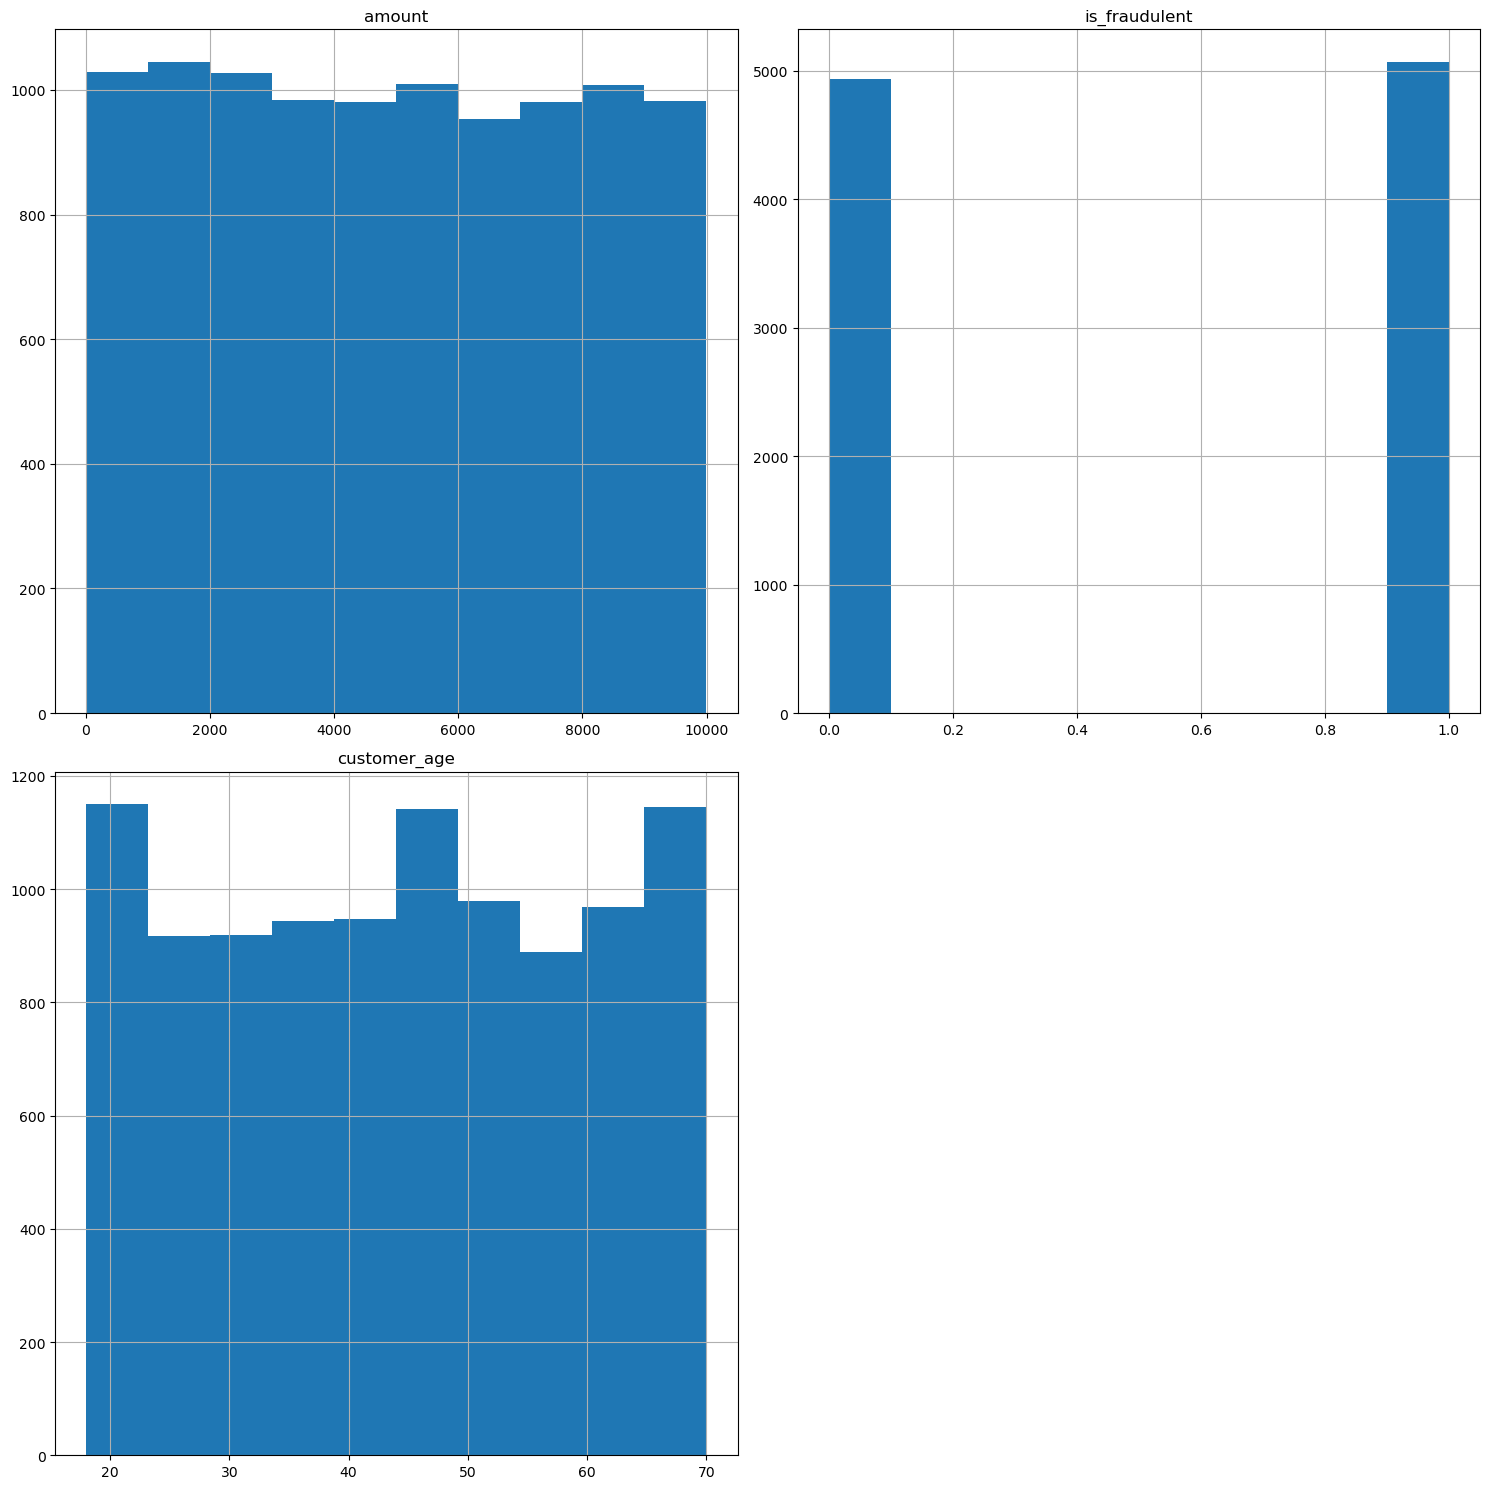

In [155]:
fin_data.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

- Customer age & amount are basically symmetrical with very little skew.
            Only two options for is_fraudulent, this leads to doing a model like logistic regression
            Let's compare if there's trends between age and likelihood of fraud.

        
- Also we have very good balance between good and fraudulent transactions.

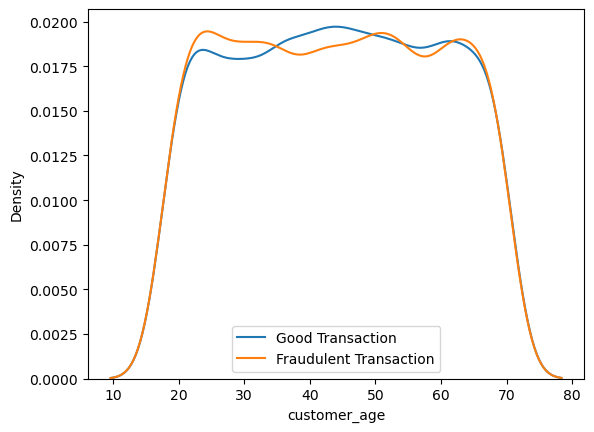

In [157]:
sns.kdeplot(fin_data.loc[fin_data['is_fraudulent']==0, 'customer_age'], label = 'Good Transaction')
sns.kdeplot(fin_data.loc[fin_data['is_fraudulent']==1, 'customer_age'], label = 'Fraudulent Transaction')

plt.legend()
plt.show()

<h3><b> Understanding Graph </b></h3>
I am using Kernal denstiy estimation (KDE) to visualize the distribution of customer ages in two categories: Good vs. Fradulent transactions.
20-35 years olds are more suspectible to fraud than 35-48 year olds, who are the least susceptible to fraud. After age 48, there isn't much of a delta.


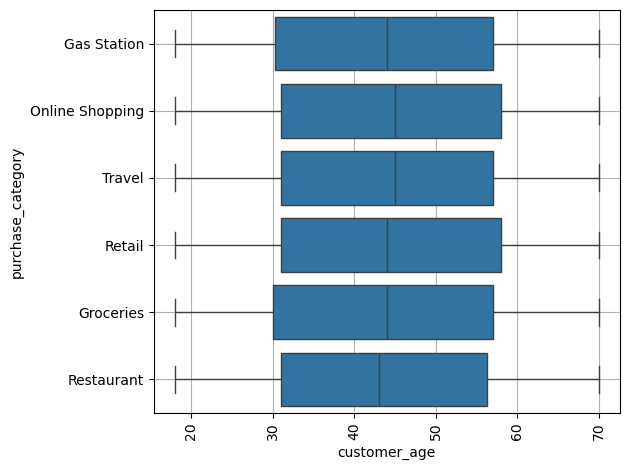

In [159]:
bp = sns.boxplot(y=fin_data['purchase_category'],x=fin_data['customer_age'])
plt.setp(bp.get_xticklabels(), rotation=90)

plt.grid(True,alpha=1)
plt.tight_layout()
plt.show()

The median person who pays for travel and online shopping is older, while the median person who goes to a restaurant or retial is younger

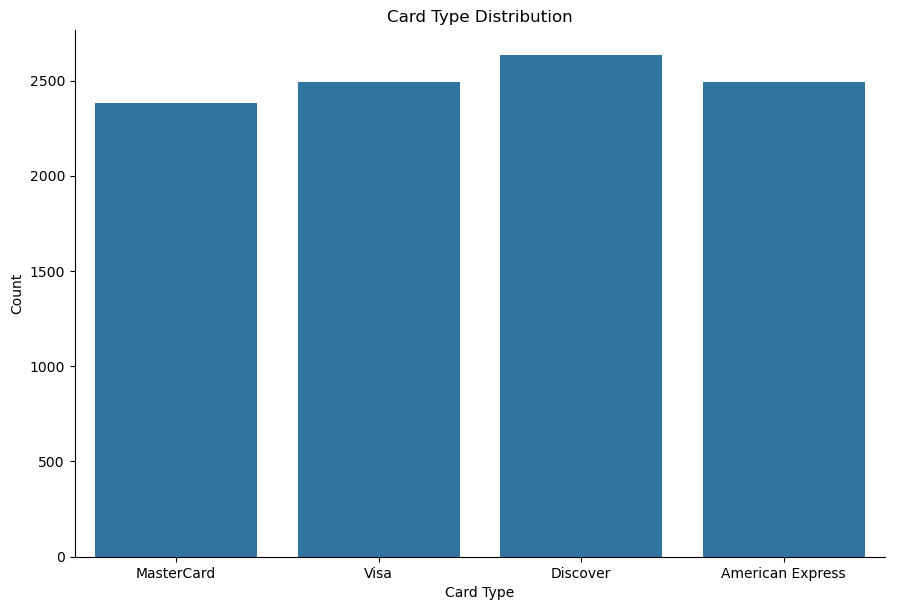

In [161]:
bp = sns.catplot(data = fin_data, x = 'card_type', kind = 'count', height = 6, aspect = 1.5)
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.title('Card Type Distribution')
plt.show()

More Discover transactions than any other card, and mastercard has the lowest amount

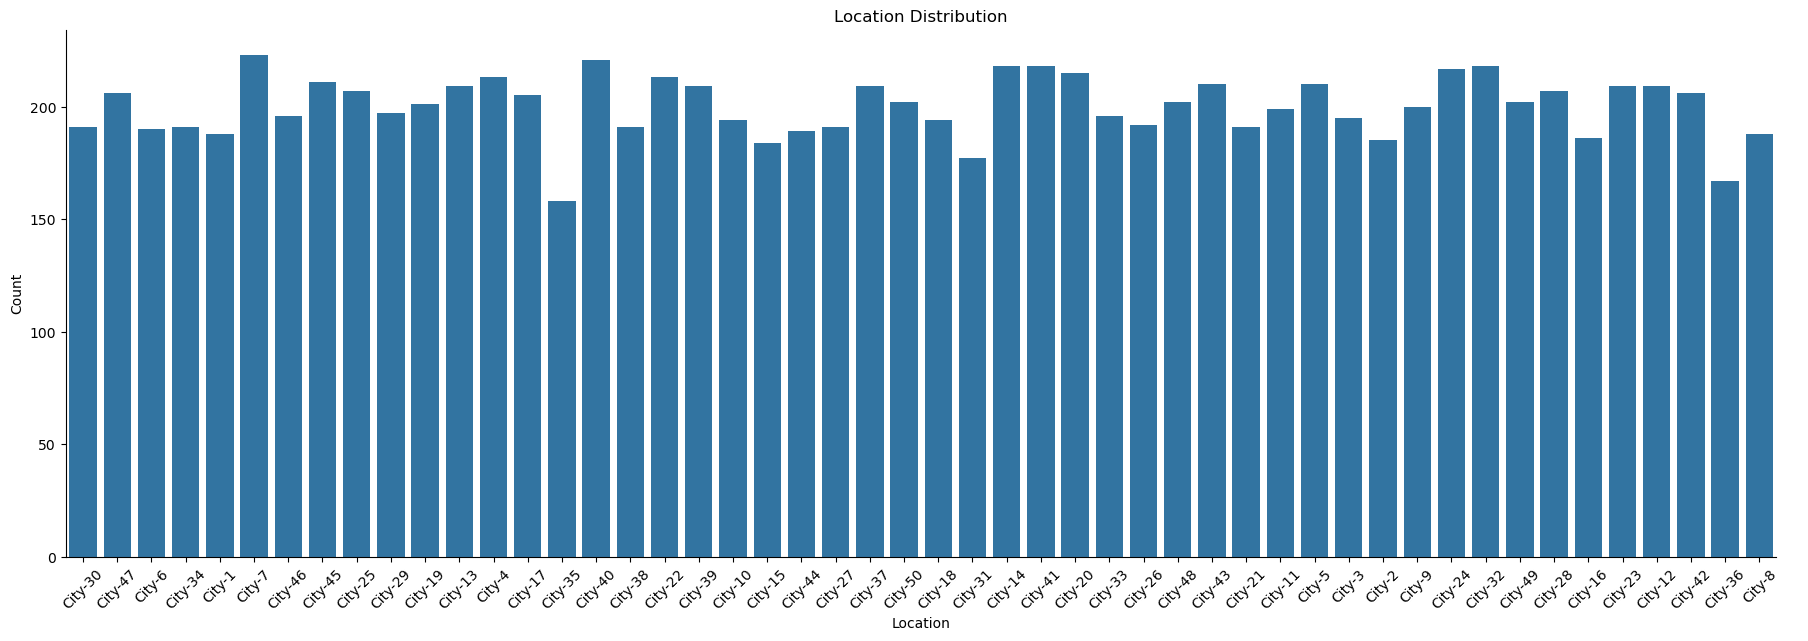

In [163]:
sns.catplot(data=fin_data,x='location',kind='count',height=6,aspect=3)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Distribution')
plt.xticks(rotation=45)
plt.show()

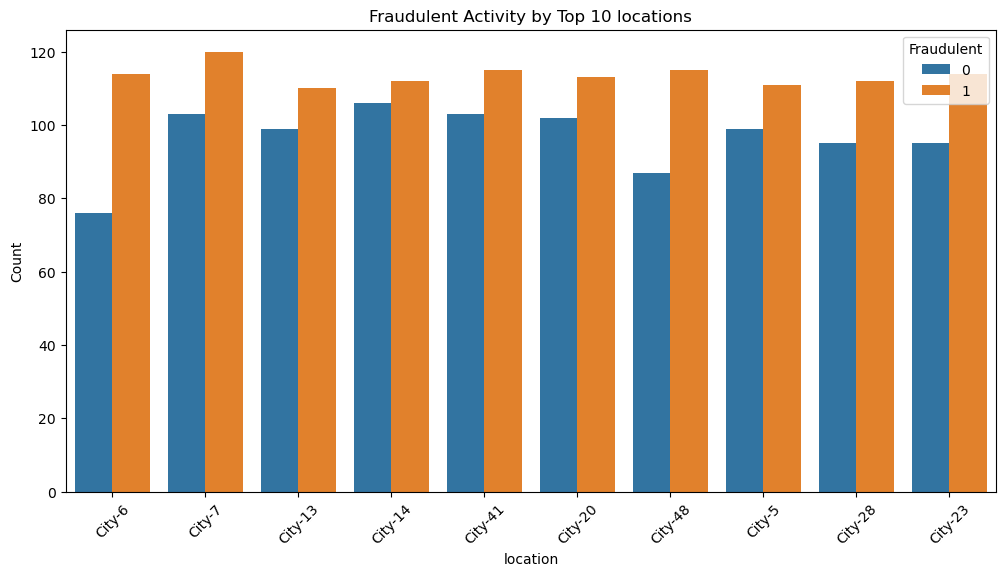

In [164]:
top_10_fraud_spots = fin_data[fin_data['is_fraudulent'] == 1]['location'].value_counts().nlargest(10).index.sort_values(ascending=True)

plt.figure(figsize=(12,6))
sns.countplot(data=fin_data[fin_data['location'].isin(top_10_fraud_spots)], x='location', hue='is_fraudulent')
plt.xlabel('location')
plt.ylabel('Count')
plt.title('Fraudulent Activity by Top 10 locations')
plt.legend(title='Fraudulent',loc='upper right')
plt.xticks(rotation=45)
plt.show()


In [165]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<h2><b> Data Pre-processing </b></h3>
<h3><b> Date conversion </b></h3>



fin_data[

In [168]:
fin_data

,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age
0,5758.59,1/1/2023 0:00,0,MasterCard,City-30,Gas Station,43
1,1901.56,1/1/2023 0:00,1,Visa,City-47,Online Shopping,61
2,1248.86,1/1/2023 0:00,1,MasterCard,City-6,Gas Station,57
3,7619.05,1/1/2023 0:00,1,Discover,City-6,Travel,59
4,1890.10,1/1/2023 0:00,1,MasterCard,City-34,Retail,36
...,...,...,...,...,...,...,...
9995,8935.28,1/1/2023 2:46,1,MasterCard,City-39,Restaurant,36
9996,30.15,1/1/2023 2:46,0,MasterCard,City-32,Retail,42
9997,6333.64,1/1/2023 2:46,0,American Express,City-1,Online Shopping,36
9998,2837.13,1/1/2023 2:46,1,Visa,City-11,Retail,57


In [169]:
fin_data['transaction_time'] = pd.to_datetime(fin_data['transaction_time'])

In [170]:
fin_data['transaction_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: transaction_time
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.3 KB


<h3><b> One hot Encoding </b></h3>

The one hot encoding technique is used to convert categorical variables into a numerical format that can be used in an ML algo. So I am transforming categorical data (like "card_type" or "location") into a numerical format. Same with purchase type and transaction time

In [173]:
fin_data_two = pd.get_dummies(fin_data, columns=['card_type', 'purchase_category', 'location'], 
                              prefix=['Card', 'purchase_type', 'Loc'])

fin_data_two['transaction_time'] = fin_data_two["transaction_time"].astype("int64")

In [174]:
fin_data_two

,amount,transaction_time,is_fraudulent,customer_age,Card_American Express,Card_Discover,Card_MasterCard,Card_Visa,purchase_type_Gas Station,purchase_type_Groceries,...,Loc_City-46,Loc_City-47,Loc_City-48,Loc_City-49,Loc_City-5,Loc_City-50,Loc_City-6,Loc_City-7,Loc_City-8,Loc_City-9
0,5758.59,1672531200000000000,0,43,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1901.56,1672531200000000000,1,61,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1248.86,1672531200000000000,1,57,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,7619.05,1672531200000000000,1,59,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,1890.10,1672531200000000000,1,36,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8935.28,1672541160000000000,1,36,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,30.15,1672541160000000000,0,42,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,6333.64,1672541160000000000,0,36,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,2837.13,1672541160000000000,1,57,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


<h3><b> Seeing Correlation Coefficients between is_fraudulent and the other variables  </b></h3>

<Axes: >

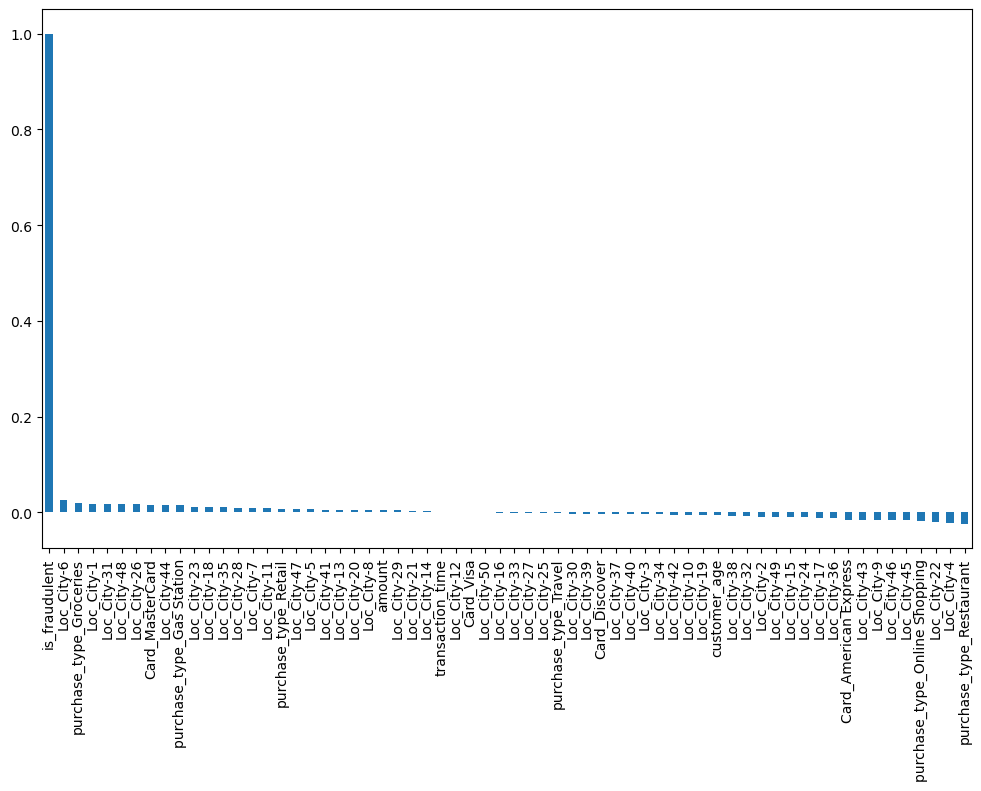

In [176]:
plt.figure(figsize=(12,7))

correlations = fin_data_two.corr()

correlations['is_fraudulent'].sort_values(ascending=False).plot(kind='bar')

City #6, grociery payments and city #1 have the strognest positive weights

Restaurant payments, City #22 and #4 have the strongest negative weights

<h1><b> ML Models </b></h1>
<h2> Logistic Regression: 51% Accuracy </h2>

In [179]:
# Step 1: Prepare the data
X = fin_data_two.drop(columns=['is_fraudulent'])  # Features (everything except the target)
y = fin_data_two['is_fraudulent']  # Target variable



In [180]:
# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24)
#with the stratify=y, I make sure I have the same distriubtion of fraud/not fraud transactions in each training/test set



In [181]:
#scaling data to normalize
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
norm = scaler.fit_transform(fin_data_two)
norm_df = pd.DataFrame(norm,columns=fin_data_two.columns)

In [182]:
model = LogisticRegression()


In [183]:
model.fit(X_train, y_train)

LogisticRegression()

In [184]:
x_train_prediction = model.predict(X_train)
traning_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [185]:
print('Accuracy on Traning Data : ', traning_data_accuracy)

Accuracy on Traning Data :  0.50675


In [186]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy on Test Data : ', test_data_accuracy)


Accuracy on Test Data :  0.507


<h2> Decision Tree: 53% Accuracy </h2>

In [188]:
# Step 3: Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)  
clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [189]:
# Step 4: Make predictions
y_pred = clf.predict(X_test)



In [190]:
# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.5020


In [191]:
# Print a detailed classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.49      0.49      0.49       986
           1       0.51      0.52      0.51      1014

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



In [192]:
from sklearn import tree
import matplotlib.pyplot as plt



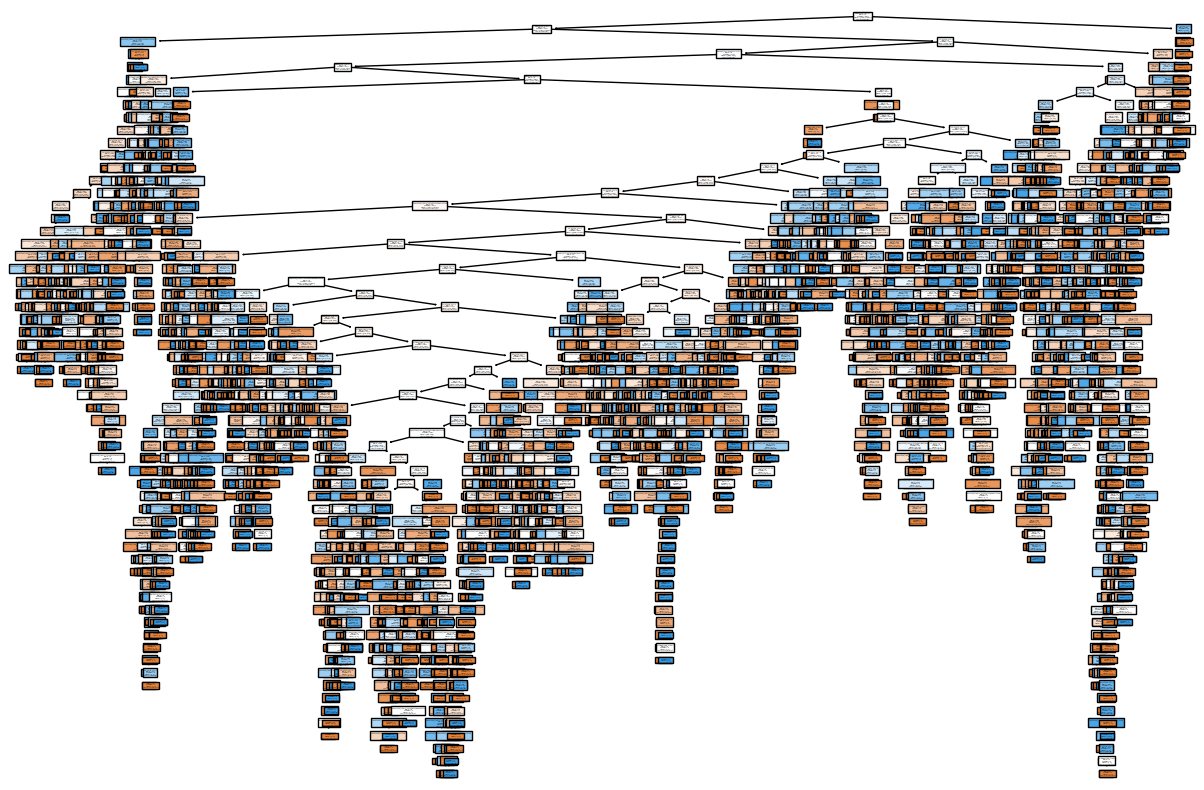

In [193]:
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Fraudulent', 'Fraudulent'])
plt.show()

The Decicion tree performed terribly, 51% accuracy, basically a coin flip. 



In [195]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=0)
smote_train , smote_target = oversampler.fit_resample(X_train,y_train)

<h3> Changing the settings - Hyperparameter Tuning </h3>

One parameter I could change is the <b>max depth of the trees. (max_depth) </b>

Deeper trees means I am trying to capting more detaililthe trade off is I am capturing noise and leads to overfitting on the test data -meaning terrible inference capabilities
Shorter trees means I am capturing less detail, trying to capture generalities, which can lead to betteer inference capabilities on the test data

The second paramter I can change is the <b> min_samples_split </b> 

This technique specifies the minimum number of samples needed to split another branch from a tree.

Increasing min_samples split will make the tree more conservative about splitting. It won't make new branches unless there are at least the min number of samples in the node. More minimum sample requirements prevent overfitting because you prevent the tree from modeling and making branches off very small samples which can have overfitting or outliers. But more minimum requirements means a chance to underfit.

If I decrease the minimum sample, it means the tree will classify (make new branches) off fewer samples, which could lead to a more complex tree to classify nuances and lead to captiure noise --> overfitting.

The third parameter I can change is the <b> min_samples_leaf </b>

Having fewer samples on a leaf, means a highly complex model capturing many different classifications, which can grab complexity but also overfit on test data
having more samples on a leaf, leads to a more simple model capturing fewer complexity and more generality, which could underfit test data.

I can basically "trial and error" by using cross-valdiation & GridSearch by trying different combos of hyperparamters (tree_depths, minimum samples to split a tree, and minimal samples on a leaf) to see which gives the best combo on training and testing performance.ns

For this Cross-validation it trains on X number of training splits, and then tests on the final one.
Grid search finds the best model for the training data, and then I use that model for inference on the test data.

In [198]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the model
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10}
Best Score: 0.5042500000000001


In [199]:
# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Print detailed classification report
print(classification_report(y_test, y_pred))

Test Accuracy: 0.5020
              precision    recall  f1-score   support

           0       0.48      0.14      0.21       986
           1       0.51      0.86      0.64      1014

    accuracy                           0.50      2000
   macro avg       0.49      0.50      0.42      2000
weighted avg       0.49      0.50      0.43      2000



<h2> Random Forest - Multiple Decision Trees: Accuracy: 54%  </h2>

In [201]:
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [202]:
rfc = RandomForestClassifier()

In [203]:
rfc = rfc.fit(x_train,y_train)

In [204]:
train_accuracy = rfc.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 1.0000


In [205]:
#my training model is overfitting

In [206]:
y_pred_rf = rfc.predict(x_test)

print('accuracy',metrics.accuracy_score(y_test,y_pred_rf))

accuracy 0.4995


The Random Forest performed well in training,
but terrible in testing, so it overfit for training data. I need to make my model capture less noise.
I can do that using a few techniques:

One technique I will try is reducing the max depth of the trees.

Deeper trees means I am trying to capture too much detail, which means I am capturing noise and outliers that doesn't fit well with the test data.
By reducing trees to 11, let's see waht happens

In [208]:
rfc = RandomForestClassifier(max_depth=11, random_state=42)

In [209]:
rfc.fit(x_train, y_train)


train_accuracy = rfc.score(x_train, y_train)
print(f"Training Accuracy with max_depth=11: {train_accuracy:.4f}")

Training Accuracy with max_depth=11: 0.8642


In [210]:
test_accuracy = rfc.score(x_test, y_test)
print(f"Test Accuracy with max_depth=11: {test_accuracy:.4f}")

Test Accuracy with max_depth=11: 0.5065


With a maximum of 11 trees, the test accuracy improved to 51%

In [212]:
rfc = RandomForestClassifier(max_depth=8, random_state=42)

In [213]:
rfc.fit(x_train, y_train)


train_accuracy = rfc.score(x_train, y_train)
print(f"Training Accuracy with max_depth=8: {train_accuracy:.4f}")

Training Accuracy with max_depth=8: 0.7420


In [214]:
test_accuracy = rfc.score(x_test, y_test)
print(f"Test Accuracy with max_depth=8: {test_accuracy:.4f}")

Test Accuracy with max_depth=8: 0.5205


With a maximum of 8 trees, the test accuracy improved to ~52%

Let's also see how much we can imporve with the number of estimators:

In [216]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)

# Step 2: Train the model
rfc.fit(x_train, y_train)

# Step 3: Evaluate accuracy on the training set
train_accuracy = rfc.score(x_train, y_train)
print(f"Training Accuracy with n_estimators=200, max_depth=8: {train_accuracy:.4f}")

# Step 4: Evaluate accuracy on the test set
test_accuracy = rfc.score(x_test, y_test)
print(f"Test Accuracy with n_estimators=200, max_depth=8: {test_accuracy:.4f}")

Training Accuracy with n_estimators=200, max_depth=8: 0.7596
Test Accuracy with n_estimators=200, max_depth=8: 0.5055


In [217]:
rfc = RandomForestClassifier(n_estimators=20, max_depth=8, random_state=42)

# Step 2: Train the model
rfc.fit(x_train, y_train)

# Step 3: Evaluate accuracy on the training set
train_accuracy = rfc.score(x_train, y_train)
print(f"Training Accuracy with n_estimators=200, max_depth=8: {train_accuracy:.4f}")

# Step 4: Evaluate accuracy on the test set
test_accuracy = rfc.score(x_test, y_test)
print(f"Test Accuracy with n_estimators=200, max_depth=8: {test_accuracy:.4f}")

#20

Training Accuracy with n_estimators=200, max_depth=8: 0.6717
Test Accuracy with n_estimators=200, max_depth=8: 0.5160


<h2> Gradient Boost </h2>

In [219]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Prepare the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
xgb_clf = xgb.XGBClassifier(random_state=42)

In [220]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'subsample': [0.8, 1.0],  # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 1.0],  # Fraction of features used per tree
    'gamma': [0, 1, 5],  # Minimum loss reduction
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [221]:
from sklearn.metrics import accuracy_score

# Use the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.5040
